In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [2]:
def openness_dict(file):
    df = pd.read_csv(file)
    out_dict = {}
    for i, row in df.iterrows():
        gene_id = row['gene_id']
        a_t = row['A_g_max']
        out_dict[gene_id] = a_t
    return out_dict
def prune():
    gene_ids = sorted(rep1_48)
    for gene in gene_ids:
        if rep1_48[gene] == 0 and rep2_48[gene] == 0 and rep3_48[gene] == 0 and rep1_72[gene] == 0 and rep2_72[gene] == 0 and rep3_72[gene] == 0:
            del rep1_48[gene]
            del rep2_48[gene]
            del rep3_48[gene]
            del rep1_72[gene]
            del rep2_72[gene]
            del rep3_72[gene]

In [3]:
rep1_48 = openness_dict('Openness output/500promoter_48hr_rep1.csv')
rep2_48 = openness_dict('Openness output/500promoter_48hr_rep2.csv')
rep3_48 = openness_dict('Openness output/500promoter_48hr_rep3.csv')
rep1_72 = openness_dict('Openness output/500promoter_72hr_rep1.csv')
rep2_72 = openness_dict('Openness output/500promoter_72hr_rep2.csv')
rep3_72 = openness_dict('Openness output/500promoter_72hr_rep3.csv')

In [4]:
prune()
gene_ids = sorted(rep1_48)

## Simple Linear Regression Model

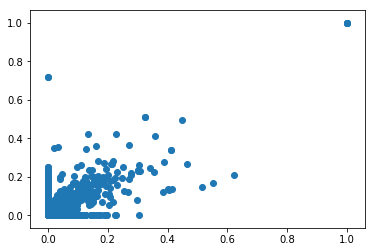

In [25]:
# X and Y for simple linear regression model
x = [rep1_48[gene_id] for gene_id in gene_ids] + [rep2_48[gene_id] for gene_id in gene_ids]
y = [rep1_72[gene_id] for gene_id in gene_ids] + [rep2_72[gene_id] for gene_id in gene_ids]
plt.scatter(x, y)

0.7340924444652926 0.01449246721110923


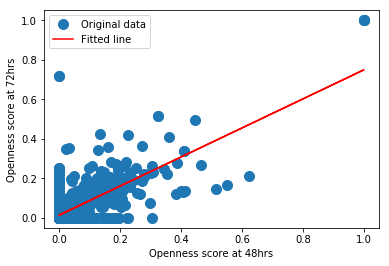

In [26]:
A = np.vstack([x, np.ones(len(x))]).T
m, c = np.linalg.lstsq(A, y, rcond=None)[0]
print(m, c)
_ = plt.plot(x, y, 'o', label='Original data', markersize=10)
_ = plt.plot(x, [m*X + c for X in x], 'r', label='Fitted line')
_ = plt.legend()
plt.xlabel('Openness score at 48hrs')
plt.ylabel('Openness score at 72hrs')
plt.show()

In [12]:
x = [rep3_48[gene_id] for gene_id in gene_ids]
y = [rep3_72[gene_id] for gene_id in gene_ids]
sq_errs = [((m*x + c) - y)**2 for x, y in zip(x, y)]
sum(sq_errs), sum(sq_errs)/len(sq_errs), max(sq_errs)

(4.094995387281773, 0.002463896141565447, 0.49288758757975576)

## More complicated linear regression model

In [15]:
gene = 'FBgn0011881' # FBgn0011958 - in both time steps, FBgn0050452 - in 48 only, FBgn0011881 - in 72 only
x = [[rep1_48[gene_id] for gene_id in gene_ids]+[1], [rep2_48[gene_id] for gene_id in gene_ids]+[1], [rep3_48[gene_id] for gene_id in gene_ids]+[1]]
y = [rep1_72[gene], rep2_72[gene], rep3_72[gene]]

In [16]:
A = np.vstack(x).T
result = np.linalg.lstsq(x, y, rcond=None)[0]
result, result.shape

(array([0.01152894, 0.00027961, 0.        , ..., 0.00095352, 0.        ,
        0.09958557]),
 (1663,))

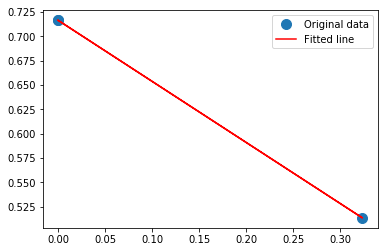

In [17]:
gene_at_48 = [rep1_48[gene], rep2_48[gene], rep3_48[gene]]
_ = plt.plot(gene_at_48, y, 'o', label='Original data', markersize=10)
_ = plt.plot(gene_at_48, [sum([result[i]*gene_openness for i, gene_openness in enumerate(X[:-1])]) + result[-1] for X in x], 'r', label='Fitted line')
_ = plt.legend()
plt.show()

In [21]:
y_pred = [sum([result[i]*gene_openness for i, gene_openness in enumerate(X[:-1])]) + result[-1] for X in x]
gene_at_48, y, y_pred

([0.0, 0.323745, 0.0],
 [0.716484, 0.513265, 0.7165520000000001],
 [0.7164840000000005, 0.5132649999999999, 0.7165519999999996])

In [23]:
sq_errs = [(y[i]-y_pred[i])**2 for i in range(3)]
sum(sq_errs), sum(sq_errs)/3, max(sq_errs)

(4.067564042545842e-31, 1.355854680848614e-31, 1.9721522630525295e-31)